<a href="https://colab.research.google.com/github/Karimi-Gichunge/Core_IP_Week2/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_07_Winfred_Karimi_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To predict which individuals are most likely to have or use a bank account  in Kenya, Rwanda, Tanzania, and Uganda.

### b) Defining the Metric for Success

The project will be a success if it is able to predict the individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda while at the same time provide insights into key demographic factors that might drive individuals’ financial outcomes.

### c) Understanding the context 

Access to bank accounts has been regarded as an indicator of financial inclusion. In Africa most adults don't have access to or use a commercial bank account. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
This study seeks to provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda,by predicting which individuals are most likely to have or use a bank account.
The study will also provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.



### d) Experimental design taken

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables hence coming up with a prediction on individuals who are most likely to have or use a bank account


### e) Data Relevance

The data provided is for the year 2016 to 2018 for all the countries in our study, i.e(Kenya, Rwanda, Tanzania, and Uganda) which will enable us come up with trends to depict which group of people are likely to have a bank account. The data also contains important variables such as Gender, Education level, Age, Has a bank account, Job type which are very useful in determining whether the different groups have access to a bank account or not.  

## 2. Reading the Data

In [1]:
#First we will import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Data from the source
# ---
data = pd.read_csv('Financial_Dataset.csv', error_bad_lines=False)
#Previewing the upper part of the data
data.head(3)

b'Skipping line 16984: expected 13 fields, saw 14\n'


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [3]:
#Previewing the lower part of the data
data.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
32071,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
32072,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
32073,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
data.shape
#The dataset has 23524 rows and 13 columns

(32074, 13)

In [5]:
#Getting column names
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [6]:
# Checking whether each column has an appropriate datatype
data.dtypes
#Here we can conclude that most of our data is of type object
#But the column year is int64 and household size and age are both float64

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
#Check for basic descriptive statistics for the numeric columns
data.describe()
#From output, we can see that the mean household size is 3.4 : 4 and the mean age is ar

,year,household_size,Respondent Age
count,32074.000000,32033.000000,32025.000000
mean,2016.785964,3.722630,38.908759
std,0.864167,2.236393,16.489457
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## 4. Tidying the Dataset

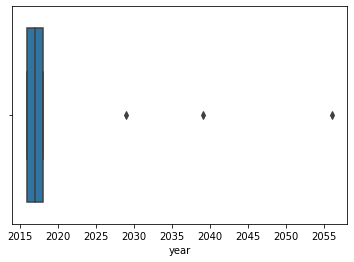

In [8]:
# Checking for Outliers
#Let's start with the column year
sns.boxplot(x=data['year'])
#There are 3 points shown outside the boxplot which are our outliers

In [9]:
#Removing outliers in the year column
outliers = data[data['year'] > 2018].index
data.drop(outliers , inplace=True)
data.shape

(32071, 13)

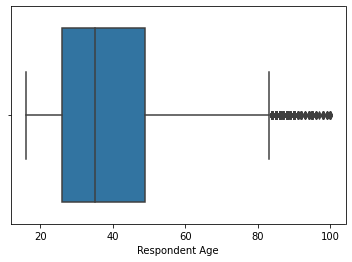

In [10]:
#Checking for outliers in the column age
sns.boxplot(x=data['Respondent Age'])
#From output, there are a number of outliers for ages between 80 to 100

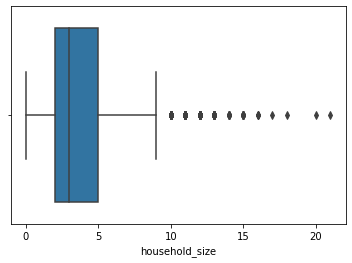

In [11]:
#Checking for outliers in the household size column
sns.boxplot(x=data['household_size'])
#From output, we can conclude that their are a few families with a household 
#size of between 10 and 21

In [12]:
# Checking for Anomalies
data['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [13]:
#Removing the outliers/anomalies using percentile
max_threshold = data['household_size'].quantile(0.95)
print(max_threshold)
data2 = data[data['household_size']<= max_threshold]
print(data2.shape)
print(data2.describe())
print(data2['household_size'].unique())

8.0
(31113, 13)
               year  household_size  Respondent Age
count  31113.000000    31113.000000    31079.000000
mean    2016.775592        3.538103       39.011712
std        0.817281        1.974095       16.531587
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2017.000000        5.000000       49.000000
max     2018.000000        8.000000      100.000000
[3. 5. 8. 7. 1. 6. 4. 2. 0.]


In [14]:
#Resetting indexes for new dataframe 
data2.reset_index().head()

,index,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
#Changing column names
data2.rename(columns={'Has a Bank account':'bank_acc',
                          'Type of Location':'residence', 'Respondent Age' : 'age', 'gender_of_respondent':'gender',
                          'Level of Educuation':'education', 'Type of Job': 'job'}, 
                 inplace=True)
data2.columns

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['country', 'year', 'uniqueid', 'bank_acc', 'residence',
       'Cell Phone Access', 'household_size', 'age', 'gender',
       'The relathip with head', 'marital_status', 'education', 'job'],
      dtype='object')

In [16]:
#Dropping unnecessary columns
data2 = data2.drop(['uniqueid', 'Cell Phone Access', 'The relathip with head', 'marital_status'], axis = 1)
print(data2.columns)

Index(['country', 'year', 'bank_acc', 'residence', 'household_size', 'age',
       'gender', 'education', 'job'],
      dtype='object')


In [17]:
# Identifying the Missing Data
#
data2.isnull().sum()

country           14
year               0
bank_acc          40
residence         23
household_size     0
age               34
gender            31
education         48
job               50
dtype: int64

In [18]:
# Dealing with the Missing Data
#Removing all rows where having a bank account is null
data3 = data2[data2['bank_acc'].notna()] 
data3.shape
data3 = data3.reset_index(drop = True) 
#Drop all columns where value is NaN
data3 = data3[data3['gender'].notna()] 
print(data3.shape)
#data3.isnull().sum()
data_df = data3.dropna(axis=0, inplace=False)
data_df.isnull().sum()

(31042, 9)


country           0
year              0
bank_acc          0
residence         0
household_size    0
age               0
gender            0
education         0
job               0
dtype: int64

In [19]:
#Check for duplicates 
data_df = data_df.drop_duplicates(inplace=False)
data_df.shape



(14834, 9)

In [20]:
#Converting datatypes
#convert column year from int64 to datetime
#and residence to category
data_df['country'] = data_df['country'].astype('category')
data_df['bank_acc'] = data_df['bank_acc'].astype('category')
data_df['residence'] = data_df['residence'].astype('category')
data_df['gender'] = data_df['gender'].astype('category')
data_df['education'] = data_df['education'].astype('category')
data_df['year']= pd.to_datetime(data_df['year']) 
data_df['job'] = data_df['job'].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14834 entries, 0 to 31072
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         14834 non-null  category      
 1   year            14834 non-null  datetime64[ns]
 2   bank_acc        14834 non-null  category      
 3   residence       14834 non-null  category      
 4   household_size  14834 non-null  float64       
 5   age             14834 non-null  float64       
 6   gender          14834 non-null  category      
 7   education       14834 non-null  category      
 8   job             14834 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(2)
memory usage: 551.7 KB


In [21]:
mean_householdsize = data_df['household_size'].mean()

data_df['household_size']=data_df.household_size.mask(data_df.household_size == 0,mean_householdsize)

## 5. Exploratory Analysis

**Univariate Analysis**:
We will be dealing with numerical variables and we will be checking the following properties:

Mean
Median
Standard Deviation
Kurtosis/skewness
distribution/range
We will also plot to visualize our data each at a time



In [22]:
#Calculate measures of central tendency
data_df.mean()
print(data_df.mean())
data_df.mode()
print(data_df.mode())
data_df.median()
print(data_df.median())


household_size     3.616130
age               40.245652
dtype: float64
  country                          year  ...          education            job
0  Rwanda 1970-01-01 00:00:00.000002018  ...  Primary education  Self employed

[1 rows x 9 columns]
household_size     3.0
age               36.0
dtype: float64


In [23]:
#Get min, max and range
#for age
min_age = data_df['age'].min()
print(min_age)
max_age = data_df['age'].max()
print(max_age)
range_age = max_age - min_age
print(range_age)
#For household size
min_size = data_df['household_size'].min()
print(min_size)
max_size = data_df['household_size'].max()
print(max_size)
range_size = max_size - min_size
print(range_size)

16.0
100.0
84.0
1.0
8.0
7.0


In [24]:
#Calculate quantiles
quantile_age = data_df["age"].quantile([0.25,0.5,0.75])
print(quantile_age)
quantile_size = data_df["household_size"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    26.0
0.50    36.0
0.75    52.0
Name: age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [25]:
#Calculating measures of dispersion
st_dev = data_df.std()
print(st_dev)
skew = data_df.skew()
print(skew)
kurt = data_df.kurtosis()
print(kurt)

household_size     2.039625
age               17.443507
dtype: float64
household_size    0.444242
age               0.750009
dtype: float64
household_size   -0.833911
age              -0.159222
dtype: float64


Summary 

1.  The mean age is 40.25, Rwanda had the highest number of entries, the data for age was positively skewed at 0.75 meaning data is moderately skewed and kurtosis of -0.16. 
2.   The mean household size is 3.61, Rwanda had the highest number of entries, the data for age was positively skewed at 0.44 meaning data is approximately skewed and kurtosis of -0.83. 




In [26]:
# Univariate Analysis
#Frequency tables
data_df.country.value_counts()

Rwanda      5069
Kenya       4819
Tanzania    3375
Uganda      1571
Name: country, dtype: int64

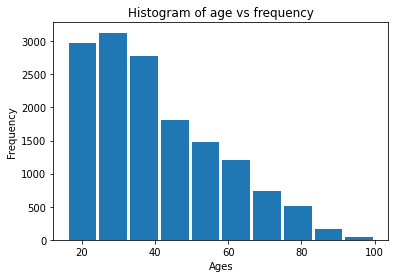

In [27]:
#Plotting a age histogram
age_points = data_df['age']

plt.hist(age_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()
#We can conclude that the greater population in the dataset is between the ages
# of 25 and 30.

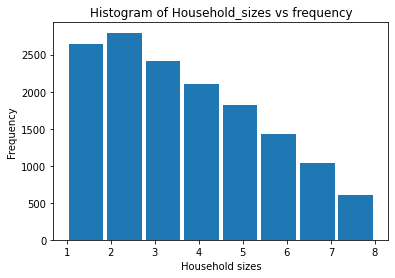

In [28]:
#Plotting a age histogram
size_points = data_df['household_size']

plt.hist(size_points, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('Household sizes')
plt.ylabel('Frequency')
plt.title('Histogram of Household_sizes vs frequency')
plt.show()
#We can conclude that the greater population in the dataset has a household size
#of between 2 to 3

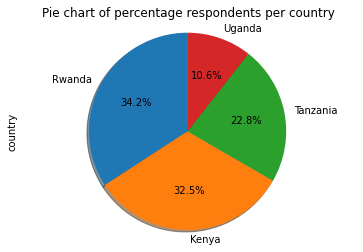

In [29]:
#pie chart for countries
data_df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()
#We can conclude that Rwanda has the highest number of respondents in this study
#at 34.2% and Uganda the lowest at 10.6%

**Summary**
1.  Greater population in the dataset is between the ages of 25 and 30.
2.  Most respondents have a household size of between 2 and 3
3. Rwanda had the highest number of respondents while Uganda had the least



**Bivariate Analysis**: At this point we will perform Bivariate analysis, check relationships and differences between two variables. We will start with Numeric-Numeric variables, then Categorical-Categorical and lastly Categorical-Numeric variables

In [30]:
#Numeric-Numeric Variables
#Checking for numeric variables in our data
#isolating numerical datatypes
numerical = data_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

household_size    float64
age               float64
dtype: object

In [31]:
#Calculating correlation
correlation = numerical.dropna().corr()
correlation

,household_size,age
household_size,1.000000,-0.127624
age,-0.127624,1.000000


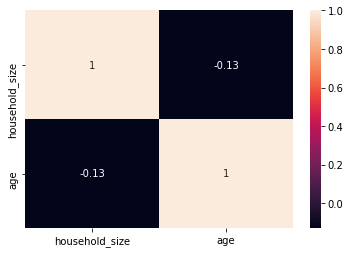

In [32]:
#plotting a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#There is basically no correlation between household size and age of respondents

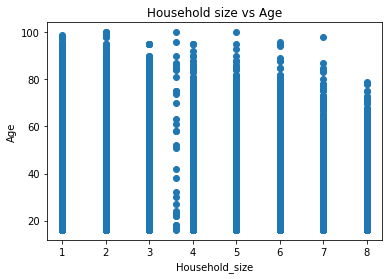

In [33]:
#Plotting scatter plots
plt.scatter(numerical["household_size"] , data_df["age"])

# Giving our scatterplot a title
plt.title('Household size vs Age')

# Labelling our x axis
plt.xlabel('Household_size')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.show()

In [34]:
#Categorical-categorical
data_df.dtypes

country                 category
year              datetime64[ns]
bank_acc                category
residence               category
household_size           float64
age                      float64
gender                  category
education               category
job                     category
dtype: object

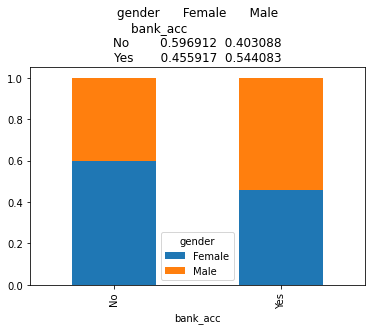

In [35]:
#Which genger is most likely to own a bank account
ax1 = data_df.groupby('bank_acc')['gender'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#the difference between the males and females who own a bank account is 
#significant. The number of Males who own a bank account is significantly more 
#than females.

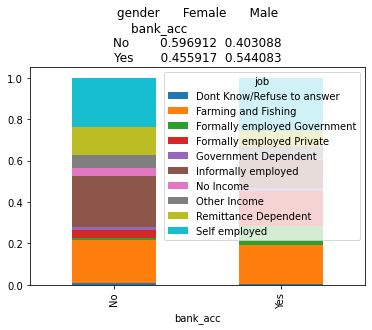

In [36]:
#People from which kind of jobs are most likely to own a bank account
ax2 = data_df.groupby('bank_acc')['job'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals who are self employed are most likely to have a bank account and
# those who are informally employed are less likely to have a bank account

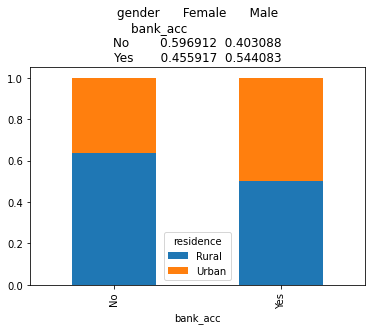

In [37]:
#People from which kind of residence are most likely to own a bank account
ax3 = data_df.groupby('bank_acc')['residence'].value_counts(normalize=True).unstack()
ax3.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals from urban setup are most likely to have a bank account and
# those from rural areas are less likely to have a bank account

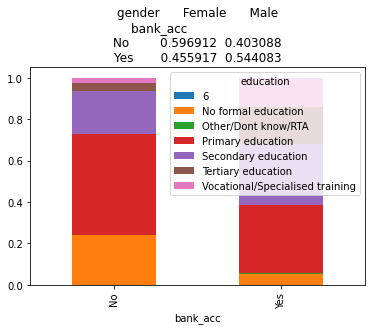

In [38]:
#Check whether people who are educated are most likely to own a bank account
ax4 = data_df.groupby('bank_acc')['education'].value_counts(normalize=True).unstack()
ax4.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals with a secondary education are most likely to have a bank account and
# those with a primary level education are less likely to have a bank account

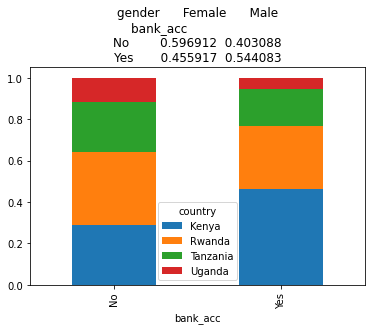

In [39]:
#People from which country are most likely to own a bank account
ax5 = data_df.groupby('bank_acc')['country'].value_counts(normalize=True).unstack()
ax5.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude 
#Individuals from Kenya are most likely to have a bank account and
# those Uganda are less likely to have a bank account

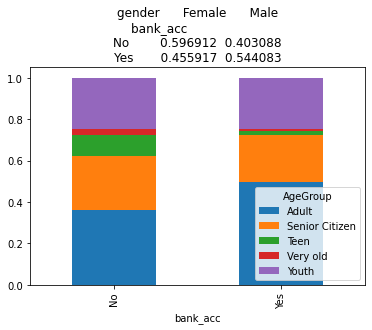

In [40]:
#Numerical-Categorical Variables
#create Age groups

bins= [10,20,30,50,80,100]
labels = ['Teen','Youth','Adult','Senior Citizen','Very old']
data_df['AgeGroup'] = pd.cut(data_df['age'], bins=bins, labels=labels, right=False)
data_df
#People from which AgeGroup are most likely to own a bank account
ax6 = data_df.groupby('bank_acc')['AgeGroup'].value_counts(normalize=True).unstack()
ax6.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude  that
#Individuals between the ages of 30_50, adults are most likely to have a bank 
# account and those above 80years are less likely to have a bank account


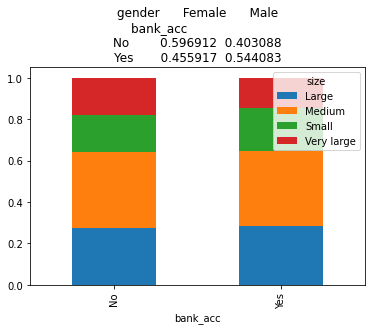

In [41]:
#create Household size groups

bins= [1,2,4,6,8]
labels = ['Small','Medium','Large','Very large']
data_df['size'] = pd.cut(data_df['household_size'], bins=bins, labels=labels, right=False)
data_df
#People from which AgeGroup are most likely to own a bank account
ax7 = data_df.groupby('bank_acc')['size'].value_counts(normalize=True).unstack()
ax7.plot(kind='bar', stacked='True',title=str(ax1))
int_level = data_df['bank_acc'].value_counts()
#From output, we can conclude  that
#Individuals from medium sized homes are most likely to have a bank 
# account and those from very large families are less likely to have a bank account


**Summary**

1.   The difference between the males and females who own a bank account is 
significant. The number of Males who own a bank account is significantly more than females.
2.   Individuals who are self employed are most likely to have a bank account and those who are informally employed are less likely to have a bank account
3. Individuals from urban setup are most likely to have a bank account and
those from rural areas are less likely to have a bank account
4.  Individuals with a secondary education are most likely to have a bank account and those with a primary level education are less likely to have a bank account
5. Individuals from Kenya are most likely to have a bank account and those Uganda are less likely to have a bank account
6. Individuals between the ages of 30-50, adults are most likely to have a bank account and those above 80years are less likely to have a bank account
7. Individuals from medium sized homes are most likely to have a bank 
account and those from very large families are less likely to have a bank account



**Multivariate Analysis**
Here we will perform the Linear Discriminant Analysis Reduction Technique and then complete by conducting the multiple regression analysis

**Checking for relationships between dependent and independent variable**

In [42]:
data_df.head(2)

,country,year,bank_acc,residence,household_size,age,gender,education,job,AgeGroup,size
0,Kenya,1970-01-01 00:00:00.000002018,Yes,Rural,3.0,24.0,Female,Secondary education,Self employed,Youth,Medium
1,Kenya,1970-01-01 00:00:00.000002018,No,Rural,5.0,70.0,Female,No formal education,Government Dependent,Senior Citizen,Large


In [64]:
#Checking for relationship between dependent variable and independent variable
df= data_df.copy()
df.head(3)
to_nums = {"bank_acc": {"Yes": 1, "No": 0},
           "residence": {"Rural": 0, "Urban": 1},
           "gender": {"Female": 2, "Male": 3}}
import scipy.stats as stats

#To convert the columns to numbers using replace :
df.replace(to_nums, inplace=True)
print(df.head())
print(df.info())
#calculate point-biserial correlation
x = df['bank_acc']
y = df['age']
stats.pointbiserialr(x, y)
#There is close to no linear correlation between age and having a bank account

x = df['bank_acc']
y = df['household_size']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = df['bank_acc']
y = df['residence']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = df['bank_acc']
y = df['gender']
stats.pointbiserialr(x, y)
#There is a weak correlation between gender and having a bank account

  country                          year  ...        AgeGroup    size
0   Kenya 1970-01-01 00:00:00.000002018  ...           Youth  Medium
1   Kenya 1970-01-01 00:00:00.000002018  ...  Senior Citizen   Large
2   Kenya 1970-01-01 00:00:00.000002018  ...           Youth   Large
3   Kenya 1970-01-01 00:00:00.000002018  ...           Adult   Large
4   Kenya 1970-01-01 00:00:00.000002018  ...           Youth     NaN

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14834 entries, 0 to 31072
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         14834 non-null  category      
 1   year            14834 non-null  datetime64[ns]
 2   bank_acc        14834 non-null  int64         
 3   residence       14834 non-null  int64         
 4   household_size  14834 non-null  float64       
 5   age             14834 non-null  float64       
 6   gender          14834 non-null  i

PointbiserialrResult(correlation=0.11410387880558051, pvalue=3.536519594800913e-44)

**Reduction Techniques**

In [44]:
#LDA using the dataset data_df
#dividing data into labels and feature set
x = data_df.iloc[:, 4:6].values
y = data_df.iloc[:, 2].values
x
y


[Yes, No, Yes, No, No, ..., No, No, No, No, No]
Length: 14834
Categories (2, object): [No, Yes]

In [45]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
#Feature scaling
#performing feature scaling:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
#performing LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print(x_test)
print(x_train)

[[ 0.45081481]
 [-1.74830906]
 [-0.63773291]
 ...
 [-2.01265019]
 [ 1.00152549]
 [-0.02522816]]
[[-0.76206402]
 [-1.13580431]
 [-1.35608858]
 ...
 [-1.57208164]
 [ 1.06761078]
 [-0.74358383]]


In [48]:
#Training and Making Predictions
#using the random forest classifier to evaluate the performance of a LDA-reduced algorithms
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [49]:
# Evaluating the Performance
# with the help of a confusion matrix and find the accuracy of the prediction.


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 80%, 


[[2356    0]
 [ 611    0]]
Accuracy0.7940680822379508


**Summary**

1.   Reduction Technique used here was **Linear Discriminant Analysis**
2.   The model achieved an accuracy of **80%**
3.   Most of the variables are not linearly related to the dependent variable



## 6. Challenging the solution

## 7. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?


*   Yes




### b). Do we need other data to answer our question?

*   The data was able to answer our research question


*   It would be good to find a dataset where the independent variables have a positive correlation with the dependent variable
  



### c). Did we have the right question?


*   Yes


